Name: Rajib Regmi
ID: 2438399

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [24]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Concept and technology of ai/WorldHappiness_Corruption_2015_2020.csv")

# Print the first few rows of the dataset to inspect the data
print("First few rows of the dataset:")
print(df.head())



First few rows of the dataset:
       Country  happiness_score  gdp_per_capita    family    health   freedom  \
0       Norway            7.537        1.616463  1.533524  0.796667  0.635423   
1      Denmark            7.522        1.482383  1.551122  0.792566  0.626007   
2      Iceland            7.504        1.480633  1.610574  0.833552  0.627163   
3  Switzerland            7.494        1.564980  1.516912  0.858131  0.620071   
4      Finland            7.469        1.443572  1.540247  0.809158  0.617951   

   generosity  government_trust  dystopia_residual continent  Year  \
0    0.362012          0.315964           2.277027    Europe  2015   
1    0.355280          0.400770           2.313707    Europe  2015   
2    0.475540          0.153527           2.322715    Europe  2015   
3    0.290549          0.367007           2.276716    Europe  2015   
4    0.245483          0.382612           2.430182    Europe  2015   

   social_support  cpi_score  
0             0.0         88  

In [32]:
# Print basic information about the dataset (columns, non-null values, data types)
print("\nDataset information:")
print(df.info())

# Selecting relevant features and target
features = ["gdp_per_capita", "happiness_score", "Year"]
target = "cpi_score"




Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB
None



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB
None


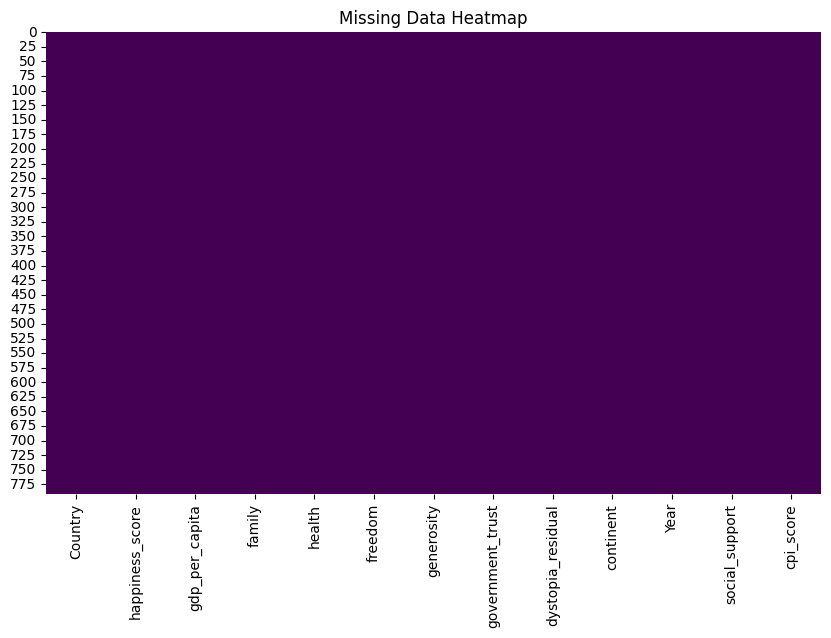

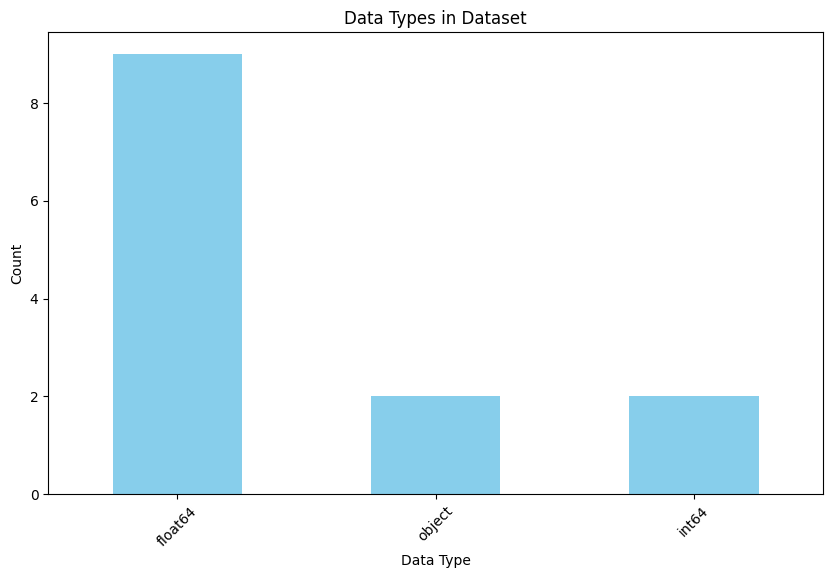

In [31]:
# Dataset information (non-null values and data types)
print("\nDataset information:")
print(df.info())

# Graphical Representation: Missing Data Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Graphical Representation: Data Types Bar Plot
plt.figure(figsize=(10, 6))
df.dtypes.value_counts().plot(kind='bar', color='skyblue')
plt.title('Data Types in Dataset')
plt.xlabel('Data Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [33]:

# Define the relevant features and target
features = ["gdp_per_capita", "happiness_score", "Year"]
target = "cpi_score"

# Selecting features (X) and target (y)
X = df[features]
y = df[target]



In [35]:
# Plotting the relationships between features and the target

# Create a 2x2 grid of plots
plt.figure(figsize=(14, 10))



<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

In [28]:
# Define the relevant features and target
features = ["gdp_per_capita", "happiness_score", "Year"]
target = "cpi_score"

# Selecting features (X) and target (y)
X = df[features]
y = df[target]



Text(0.5, 1.0, 'GDP per Capita vs CPI Score')

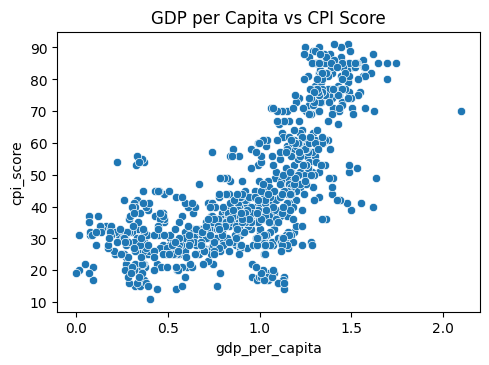

In [29]:
# Set up a figure for the plot
plt.figure(figsize=(12, 8))

# Scatter plot between GDP per capita and CPI score
plt.subplot(2, 2, 1)
sns.scatterplot(x=X["gdp_per_capita"], y=y)
plt.title('GDP per Capita vs CPI Score')



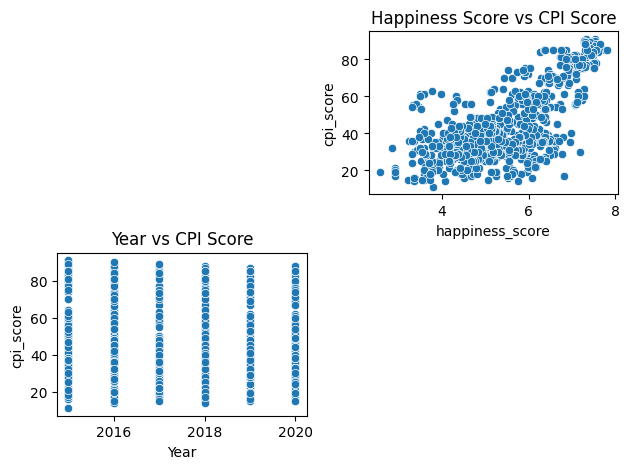

In [30]:
# Scatter plot between Happiness Score and CPI score
plt.subplot(2, 2, 2)
sns.scatterplot(x=X["happiness_score"], y=y)
plt.title('Happiness Score vs CPI Score')

# Scatter plot between Year and CPI score
plt.subplot(2, 2, 3)
sns.scatterplot(x=X["Year"], y=y)
plt.title('Year vs CPI Score')

# Show the plots
plt.tight_layout()
plt.show()

In [17]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [37]:
# SVR Model with Hyperparameter Tuning
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", "auto", 0.01, 0.1, 1],
    "kernel": ["rbf", "linear"]
}
svr_grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring="r2", n_jobs=-1)
svr_grid_search.fit(X_train_scaled, y_train)
best_svr = svr_grid_search.best_estimator_
y_pred_svr = best_svr.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)



In [19]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)



In [20]:
# Comparing Results
print("Best SVR Parameters:", svr_grid_search.best_params_)
print("SVR Model - MSE:", mse_svr, "R2:", r2_svr)
print("Linear Regression Model - MSE:", mse_lr, "R2:", r2_lr)

# Determining the best model
if r2_lr > r2_svr:
    print("Linear Regression is more accurate.")
else:
    print("SVR Model is more accurate.")



Best SVR Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
SVR Model - MSE: 109.17900311597488 R2: 0.6934929326560616
Linear Regression Model - MSE: 192.14840250719644 R2: 0.46056621084236615
SVR Model is more accurate.


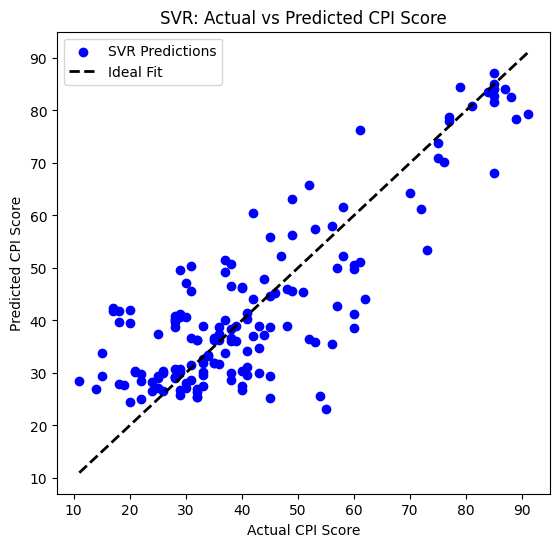

In [21]:
# Graphical Representation
plt.figure(figsize=(14, 6))

# Scatter plot of actual vs predicted values for SVR
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_svr, color='blue', label='SVR Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual CPI Score')
plt.ylabel('Predicted CPI Score')
plt.title('SVR: Actual vs Predicted CPI Score')
plt.legend()



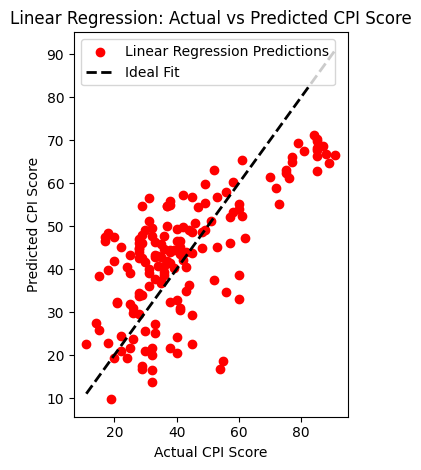

In [22]:
# Scatter plot of actual vs predicted values for Linear Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lr, color='red', label='Linear Regression Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual CPI Score')
plt.ylabel('Predicted CPI Score')
plt.title('Linear Regression: Actual vs Predicted CPI Score')
plt.legend()

plt.tight_layout()
plt.show()